<a href="https://colab.research.google.com/github/khanhduy0703/desktop-tutorial/blob/main/ti%C3%AAu_%C4%91%C6%B0%E1%BB%9Dng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



📋 Cấu trúc mạng nơ-ron:


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                │ (None, 256)            │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,569 (178.00 KB)

 Trainable params: 45,569 (178.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5385 - loss: 0.6642 - val_accuracy: 0.7143 - val_loss: 0.5815
Epoch 2/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7621 - loss: 0.5404 - val_accuracy: 0.7338 - val_loss: 0.5060
Epoch 3/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7794 - loss: 0.4798 - val_accuracy: 0.7403 - val_loss: 0.4984
Epoch 4/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7896 - loss: 0.4573 - val_accuracy: 0.7468 - val_loss: 0.4945
Epoch 5/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7985 - loss: 0.4431 - val_accuracy: 0.7403 - val_loss: 0.4946
Epoch 6/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8059 - loss: 0.4316 - val_accuracy: 0.7468 - val_loss: 0.4939
Epoch 7/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8118 - loss: 0.4211 - val_accuracy: 0.7532 - val_loss: 0.4934
Epoch 8/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8241 - loss: 0.4119 - val_accuracy: 0.7597 - 

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

🎯 Accuracy trên tập test: 0.6818

📊 Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.76      0.74      0.75        99
           1       0.55      0.58      0.57        55

    accuracy                           0.68       154
   macro avg       0.66      0.66      0.66       154
weighted avg       0.69      0.68      0.68       154



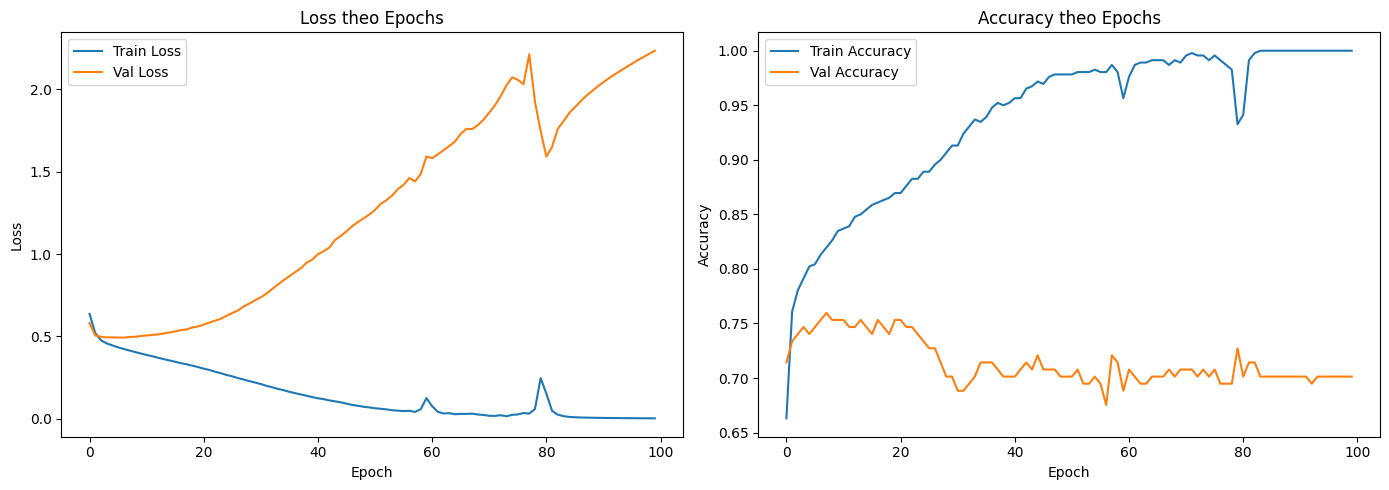

In [19]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight

# 1. Seed cho phép tái lập (có thể bỏ nếu muốn random)
np.random.seed(42)
tf.random.set_seed(42)

# 2. Tải dữ liệu
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
           'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv(url, names=columns)

# 3. Xử lý giá trị 0 không hợp lý
cols_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_to_fix:
    df[col] = df[col].replace(0, df[col].mean())

# 4. Tách dữ liệu
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# 5. Chia train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. Chuẩn hóa
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# 7. Xây mạng nơ-ron mạnh hơn (Deep ANN)
model = Sequential([
    Dense(256, activation='relu', input_shape=(X.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
# 8. Compile
model.compile(
    optimizer=Adam(learning_rate=0.0003),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 9. In kiến trúc
print("\n📋 Cấu trúc mạng nơ-ron:")
model.summary()

# 10. Train đủ 300 epoch, không dừng sớm, batch nhỏ, validation kỹ, cân bằng class
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=8,
    validation_split=0.25,
    verbose=1,
    class_weight=class_weight_dict # Pass the class weight dictionary here
)

# 11. Dự đoán và đánh giá
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

acc = accuracy_score(y_test, y_pred_classes)
print(f"\n🎯 Accuracy trên tập test: {acc:.4f}")
print("\n📊 Báo cáo phân loại:\n", classification_report(y_test, y_pred_classes))

# 12. Vẽ biểu đồ Loss & Accuracy
plt.figure(figsize=(14, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss theo Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy theo Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
# Tạo widget nhập liệu
input_widgets = {
    'Pregnancies': widgets.IntText(value=0),
    'Glucose': widgets.FloatText(value=120.0),
    'BloodPressure': widgets.FloatText(value=70.0),
    'SkinThickness': widgets.FloatText(value=20.0),
    'Insulin': widgets.FloatText(value=80.0),
    'BMI': widgets.FloatText(value=25.0),
    'DiabetesPedigreeFunction': widgets.FloatText(value=0.5),
    'Age': widgets.IntText(value=30),
}

predict_button = widgets.Button(description="Dự đoán")
output_box = widgets.Output()

def on_predict_clicked(b):
    with output_box:
        clear_output()
        input_data = np.array([[input_widgets[key].value for key in input_widgets]])
        input_scaled = scaler.transform(input_data)
        prediction = model.predict(input_scaled)[0][0]
        label = "⚠️ Nguy cơ bị tiểu đường!" if prediction > 0.5 else "✅ Không bị tiểu đường."
        print(f"Kết quả dự đoán: {label} (Xác suất: {prediction:.2f})")

predict_button.on_click(on_predict_clicked)

# Hiển thị toàn bộ giao diện
display(widgets.VBox([widgets.Label("🔢 Nhập thông tin bệnh nhân")] +
        [widgets.HBox([widgets.Label(f"{k}: "), input_widgets[k]]) for k in input_widgets] +
        [predict_button, output_box]))
